# Теоретический материал – Эволюционные методы
Деревья решений являются одним из наиболее эффективных.   
Эволюционные методы   
Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи следующего вида:   
{$X_1,X_2,...X_n$}   

Этапы генетического алгоритма могут быть представлены в следующем виде:
```
```
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
 { Выбор родительской пары хромосом;
 Кроссовер;
 Мутации;
 Оценка функции полезности F потомков;
 Селекция;
 }
 Замена текущего поколения новым;
}

# 1.1.1 Пример
**Задача:**   
Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы $𝑏_1$, $𝑐_1$, $𝑏_2$, $𝑐_2$, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:

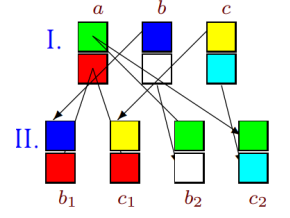

Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

Потребуется несколько функций для реализации алгоритма. Напишем их.

**Решение:**

In [23]:
# функция качества хромосомы
def qZ(x,y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)


# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    
    return X, Y


def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId


# шаг эволюции
def evostep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z


# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evostep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results

Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах. Пусть даны следующие массивы хромосом X и Y:
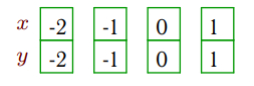   

In [24]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# реализация алгоритма
results = evoSteps(X, Y)

In [25]:
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


# Задание
**Задача:**   
Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными. (Вариант 10)

**Решение:**

In [1]:
def qZ(x,y):
    return (x-3*y)/(2*x**2+2*y**2+1)

def qSumZ(Z):
    return sum(Z)
    
def exchangeScheme(oldX, oldY, sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]
    
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    
    X[0]=oldX[sortedId[0]]
    
    X[1]=oldX[sortedId[1]]
    
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    
    Y[2]=oldY[sortedId[0]]
    
    Y[3]=oldY[sortedId[1]]
    
    return X,Y

def sorting(Z):
    sortedId=sorted(range(len(Z)), key=lambda k: Z[k])
    
    return sortedId

def evoStep(X,Y,Z):
    _, minId=min((value,id) for (id, value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X,Y,Z

def evoSteps(X,Y, stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i]) for i, x in enumerate(X)]
        
        X,Y,Z=evoStep(X, Y, arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ), arrZ])
    return X,Y,results

In [2]:
X=[-1,0,2,3]
Y=[0,1,-2,2]

results=evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ +=results[2][i][3]
    
print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: 0.7748068924539511
max_3_step: 0.9251336898395722
max_4_step: 1.7290552584670231
max Z: 0.47058823529411764


# 1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.   
Алгоритм имитации отжига включает следующие этапы:
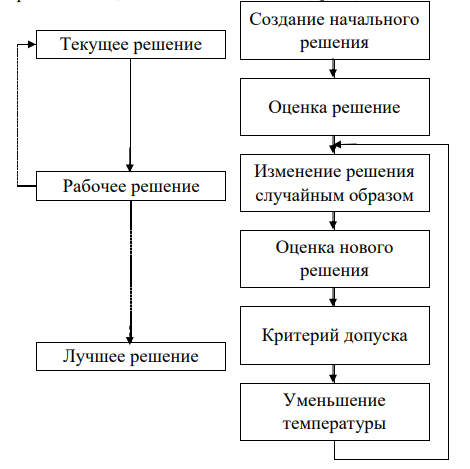   
Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.   
Итак, необходимо Найти длину гамильтонова цикла $𝑆_4$ в полном графе
$𝐾_6$ после четырех циклов решения задачи методом отжига. Даны расстояния
$𝐿_{𝑖,𝑗}$ между вершинами. Даны также: начальная последовательность вершин
$𝐿_0$, последовательность замен вершин $𝑍$ и выпавшие при этом вероятности
перехода $𝑃_𝑘, 𝑘 = 1, . . . , 4$.   
Переход на худшее $(∆𝑆_𝑘 = 𝑆_𝑘 − 𝑆_{𝑘−1} > 0)$ решение допустим, если
$𝑃_∗ = 100$ где снижение температуры происходит по закону $𝑇_{𝑘+1} = 0.5𝑇_𝑘$ от
$𝑇_1 = 100$

# 1.2.1 Пример
**Задача:**   
Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:
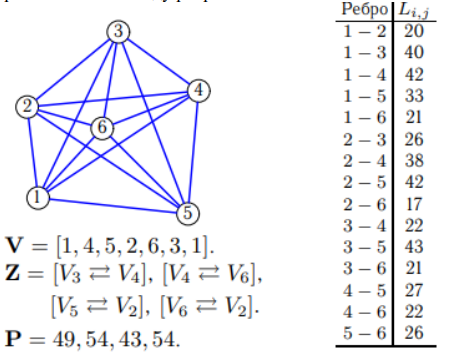

**Решение:**

In [14]:
import networkx as nx
from math import e

distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины ребёр

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

In [15]:
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextT

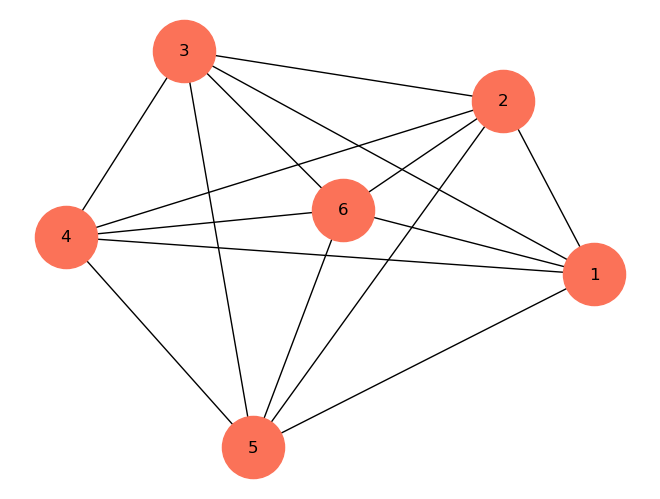

In [16]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка шрафа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [36]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

# перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [42]:
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
        
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
            
            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) # вычисление температуры
        
    return V, arrSum

In [43]:
# отрисовка графа по заданному маршуруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
                
    graph = nx.Graph()
    
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


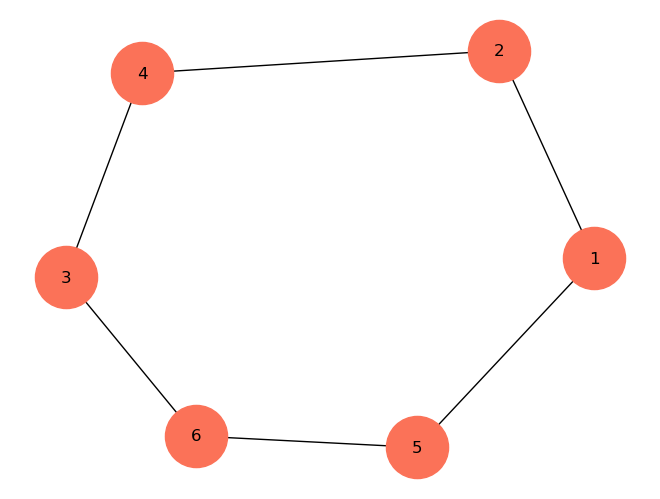

In [44]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

# Задание

Задача: Найти длину гамильтонова цикла S4 в полном графе K6 после четырех 
циклов решения задачи методом отжига по вариантам ниже. (варинат 2)

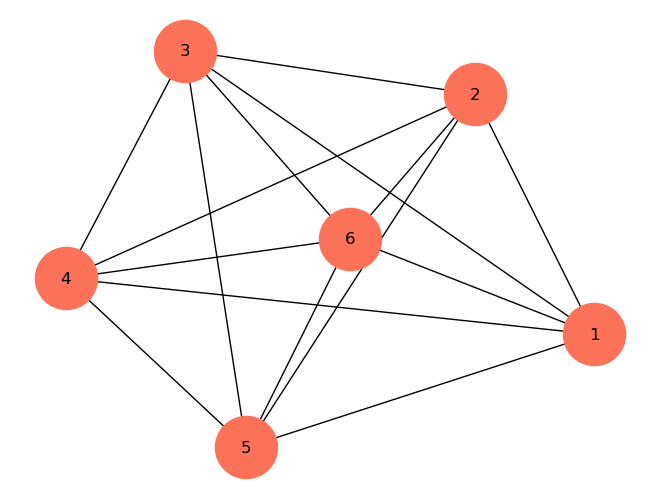

In [31]:
import networkx as nx
from math import e

# длины ребер
distances=[(1,2,25),(1,3,41),(1,4,38),(1,5,27),(1,6,20),(2,3,21),(2,4,34),(2,5,39),(2,6,17),(3,4,24),(3,5,40),(3,6,22),(4,5,21),(4,6,21),(5,6,22)]

# последовательность прохождения маршрута
V=[1,3,5,4,6,2,1]

#последовательность замен вершин
Z=[(3,4),(4,6),(5,6),(2,4)]

# млучайные числа, выпавшие в процессе счета 
P=[41,60,85,60]

# начальная температура
T=100

# функции вероятности
def probability(delta, T):
    return 100*e**(-delta/T)

# функции изменения температуры
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT

# создание пустого графа
graph=nx.Graph()

# добавление весов ребер
graph.add_weighted_edges_from(distances)

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color= '#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длина всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


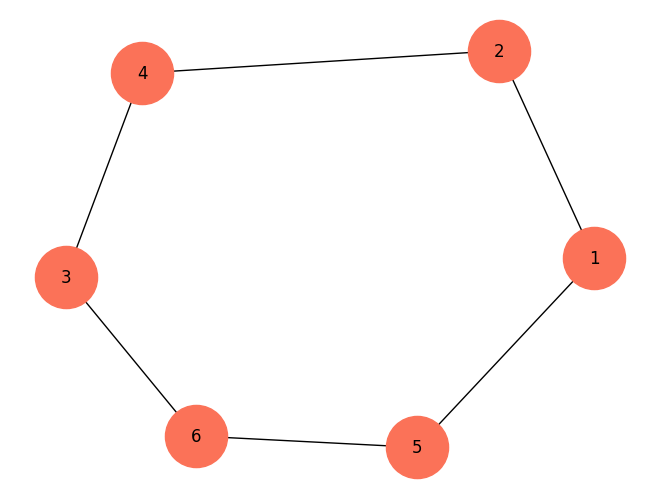

In [5]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j) or (item[1]==i and item[0]==j) else -1 ) for item in distances])
    else:
        return max([(item[2] if (item[0]==i and item[1]==j) else -1) for item in distances])
    
# вычислим длину маршрута
def routeLength(V, distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)

# запишем функцию для однократной перестановки в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement=1 if replacementByName else 0
    
    arrV[Z[0]-decrement], arrV[Z[1]-decrement]=arrV[Z[1]-decrement], arrV[Z[0]-decrement]
    return arrV

# перестановка в пути
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    # нахождение длины пути
    sumLength=routeLength(V, distances)
    # массив сумм длин
    arrSum=[sumLength]
    #цикл метода отжига
    for i in range(len(Z)):
        # новый маршрут после перестановки
        newV=routeOneReplacement(V[:],Z[i])
        # длина нового маршрута
        newS=routeLength(newV, distances)
        arrSum.append(newS)
        #разница между длиной нового и старого маршрутов
        deltaS=newS-sumLength
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS>0:
            # подсчет вероятности
            p=probability(deltaS,T)
            # если заданная вероятность попадает в иньервал от 0 до р, то новый маршрут выберается
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
            # вычисление температуры
        T=reductTemp(T)
    return V, arrSum

# отрисовать граф по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances=[]
    # прохождение по вектору
    for i in range(len(bestRoute)-1):
        for distance in distances:
            # перенос писать в строчку
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
                
    # создание пустого графа
    graph=nx.Graph()
    # добавление весов ребер
    graph.add_weighted_edges_from(newDistances)
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

# рассчитаем наилучший маршрут и его длину
bestRoute, arrLength=chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}') 
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длина всех рассмотренных маршрутов: {arrLength}')

# отрисовка лучшего маршрута
drawRouteGraph(distances, bestRoute)